In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
# from localBKG import *
from scipy import stats
# from bestBkg import *
from astropy import stats
import healpy as hp
# from nearNeighborsHEALPix import *
from localBKG_and_interlopersHEALPix import *
import healpy as hpy
import mpl_scatter_density
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data1 = hdulist3[1].data
DECaLS_data2 = hdulist4[1].data

id_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)

id_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)

print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.

['0' '0' '0' ... '0' '0' '0']
length of id_ALL:  5182673
751158
['0' '0' '0' ... '0' '0' '0']
length of id_ALL:  4008392
239270
end readdata


In [3]:
# calculate LRG magnitudes

# print(z_LRG1[0])
# print(z_LRG2[0])
# print('RA')
# print(ra_LRG1[0])
# print(ra_LRG2[0])
# print(ra_BKG1[np.where(ra_BKG1 < 245.)])
# print(ra_BKG2[5])

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1)
# gmag_LRG2 = 22.5 - 2.5 * np.log10(gflux_LRG2)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1)
# rmag_LRG2 = 22.5 - 2.5 * np.log10(rflux_LRG2)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1)
# zmag_LRG2 = 22.5 - 2.5 * np.log10(zflux_LRG2)

# gmag_LRG_nocuts = np.concatenate([gmag_LRG1, gmag_LRG2])
# rmag_LRG_nocuts = np.concatenate([rmag_LRG1, rmag_LRG2])
# zmag_LRG_nocuts = np.concatenate([zmag_LRG1, zmag_LRG2])
    
# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag_BKG = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG = np.concatenate([zmag_BKG1, zmag_BKG2])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG = gmag_BKG - rmag_BKG
rzcolor_BKG = rmag_BKG - zmag_BKG

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
# print(len(ra_LRG_nocuts))
ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1
# zmag_LRG_nocuts = zmag_LRG
# print(len(z_LRG))
# plate_LRG_nocuts = np.concatenate([plate_LRG1, plate_LRG2])
# tile_LRG_nocuts = np.concatenate([tile_LRG1, tile_LRG2])

# print(len(zmag_LRG_nocuts))
# print(len(z_LRG_nocuts))

# cut for zmag brighter than 22.75

ra_LRG = ra_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]
dec_LRG = dec_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]
id_LRG = id_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]

ra_BKG = ra_BKG[np.where(zmag_BKG <= 22.75)]
dec_BKG = dec_BKG[np.where(zmag_BKG <= 22.75)]

z_LRG = z_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]

gmag_LRG = gmag_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]
rmag_LRG = rmag_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]
zmag_LRG = zmag_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]
grcolor_LRG = grcolor_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]
rzcolor_LRG = rzcolor_LRG_nocuts[np.where((zmag_LRG_nocuts <= 22.75) & (z_LRG_nocuts > 0.2))]

gmag_BKG = gmag_BKG[np.where(zmag_BKG <= 22.75)]
rmag_BKG = rmag_BKG[np.where(zmag_BKG <= 22.75)]
zmag_BKG = zmag_BKG[np.where(zmag_BKG <= 22.75)]
grcolor_BKG = grcolor_BKG[np.where(zmag_BKG <= 22.75)]
rzcolor_BKG = rzcolor_BKG[np.where(zmag_BKG <= 22.75)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
print(len(dec_LRG))
print(len(gmag_LRG))
print(len(rmag_LRG))
print(len(zmag_LRG))
print(len(id_LRG))

1983
1983
1983
1983
1983
1983


minimum zmag:  10.274504
maximum zmag:  22.75
minimum rzcolor:  -10.594492
maximum rzcolor:  11.349674
minimum grcolor:  -10.262857
maximum grcolor:  13.989075
0.8467857


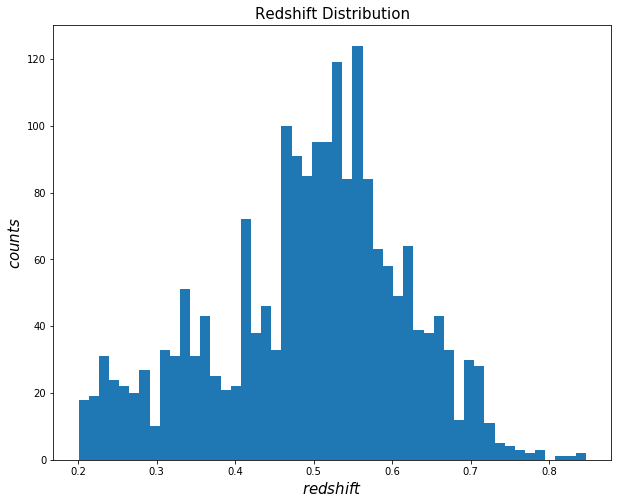

In [4]:
zHist(z_LRG)

print("minimum zmag: ", min(zmag))
print("maximum zmag: ", max(zmag))
print("minimum rzcolor: ", min(rzcolor))
print("maximum rzcolor: ", max(rzcolor))
print("minimum grcolor: ", min(grcolor))
print("maximum grcolor: ", max(grcolor))
print(max(z_LRG))

# print(len(z_LRG[np.where(z_LRG < 0.2)]))

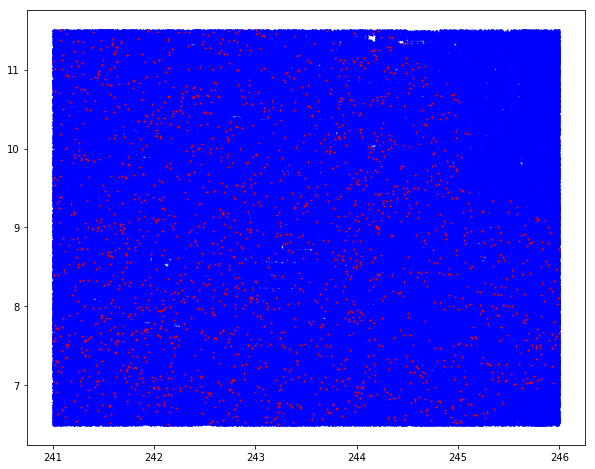

In [5]:
plt.scatter(ra_BKG, dec_BKG, s=1, color='blue')
plt.scatter(ra_LRG, dec_LRG, s=1, color='red')
plt.rcParams["figure.figsize"] = [15, 15]
plt.show()

In [6]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


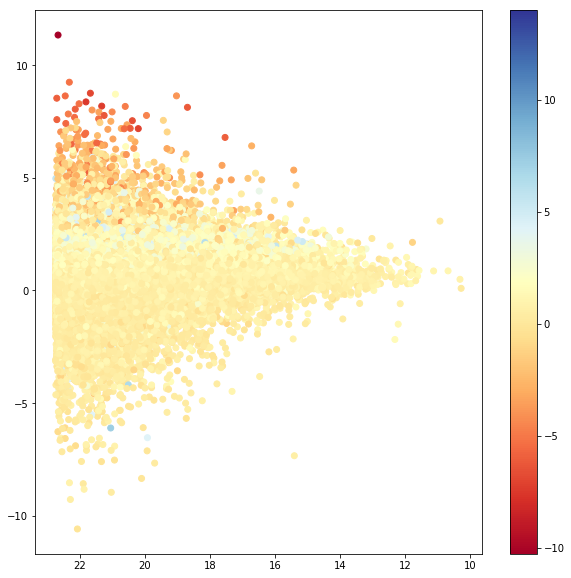

[-10.59449196  -9.86301975  -9.13154755  -8.40007534  -7.66860313
  -6.93713093  -6.20565872  -5.47418652  -4.74271431  -4.0112421
  -3.2797699   -2.54829769  -1.81682549  -1.08535328  -0.35388107
   0.37759113   1.10906334   1.84053555   2.57200775   3.30347996
   4.03495216   4.76642437   5.49789658   6.22936878   6.96084099
   7.69231319   8.4237854    9.15525761   9.88672981  10.61820202
  11.34967422]
[10.27450371 10.69035358 11.10620346 11.52205334 11.93790321 12.35375309
 12.76960297 13.18545284 13.60130272 14.0171526  14.43300247 14.84885235
 15.26470222 15.6805521  16.09640198 16.51225185 16.92810173 17.34395161
 17.75980148 18.17565136 18.59150124 19.00735111 19.42320099 19.83905087
 20.25490074 20.67075062 21.08660049 21.50245037 21.91830025 22.33415012
 22.75      ]
[-10.26285744  -9.4544597   -8.64606196  -7.83766422  -7.02926648
  -6.22086875  -5.41247101  -4.60407327  -3.79567553  -2.98727779
  -2.17888006  -1.37048232  -0.56208458   0.24631316   1.0547109
   1.86310863 

In [7]:
# H1, edges = np.histogramdd((rzcolor, zmag, grcolor), bins=30, range=((min(rzcolor), 29.), (min(zmag), 35.), (min(grcolor), 34.)), density=False)
H1, edges = np.histogramdd((rzcolor, zmag, grcolor), bins=30, density=False)

# make 2D projections of 3D histogram
rz_v_zmag = H1[:, :, :].sum(axis=2)
rz_vs_zmag = np.fliplr(rz_v_zmag)
gr_v_zmag = H1[:, :, :].sum(axis=0)
gr_vs_zmag = np.flipud(gr_v_zmag.T)
gr_v_rz = H1[:, :, :].sum(axis=1)
gr_vs_rz = np.flipud(gr_v_rz.T)


plt.figure(figsize=(10,10))

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(zmag, rzcolor, c=grcolor, cmap=cm)
plt.colorbar(sc)
plt.gca().invert_xaxis()
plt.show()

print(edges[0])
print(edges[1])
print(edges[2])

In [8]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hpy.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hpy.ang2pix(nside, theta, phi, nest=True)

length phi:  659548


In [9]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, zmag_LRG, zmag_BKG, rzcolor_LRG, rzcolor_BKG, grcolor_LRG, grcolor_BKG, edges)

print('end nearNeighbor')


end nearNeighbor


mean number of near neighbors is 56.60514372163389
median number of near neighbors is 49.0
standard deviation of near neighbor is 28.573708134184987
standard error is 0.6418222656270868


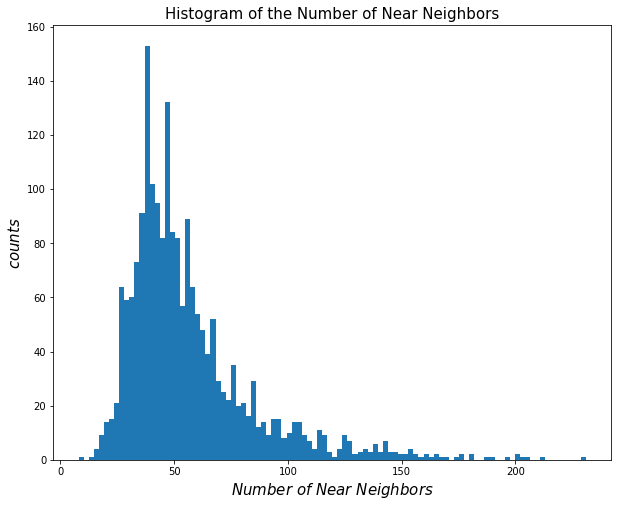

In [10]:
totalNear(near)

plt.show()


In [11]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, zmag, rzcolor, grcolor, edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")


end bkg


mean number of interlopers is 44.72161835770164
median number of interlopers is 39.080279781643775
standard deviation of interloper is 21.752737762016295
standard error is 0.488609716612387


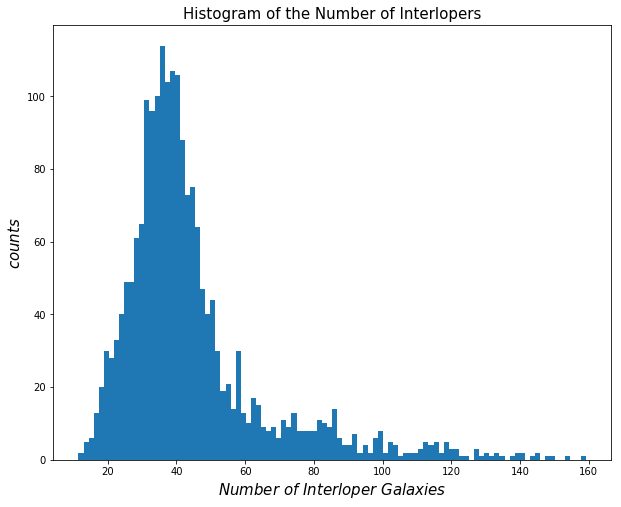

In [12]:
totalNbkg(Nbkg)

plt.show()

Nbkg = np.array(Nbkg)

In [13]:
Nsat = np.array(near) - np.array(Nbkg)

print("end Nsat")

print(np.sum(Nsat[0]))

end Nsat
81.52705949185112


mean number of satellites is 11.883525363932257
median number of satellites is 8.936135205269762
standard deviation of satellites is 18.210145384954238
standard error is 0.40903605207568694


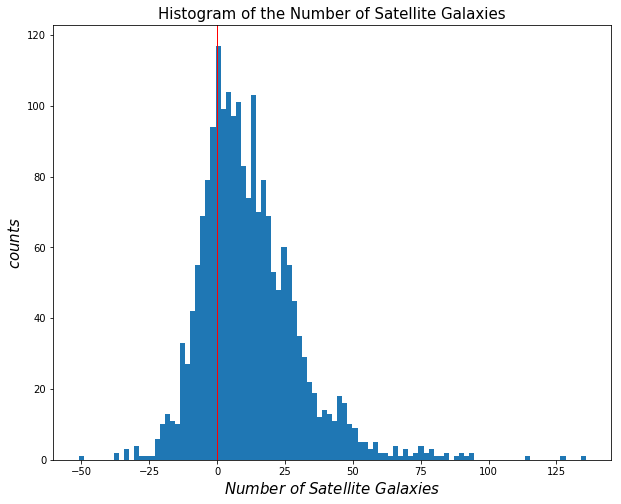

In [14]:
totalNsat(Nsat)

plt.savefig('/Users/mtownsend/Desktop/Nsat.jpeg')
plt.show()


In [35]:
sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag  = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

mean number of satellites is 18.856434571531643
median number of satellites is 14.29542159628809
standard deviation of satellites is 27.711100705202032
standard error is 1.357018439914588


14.29542159628809

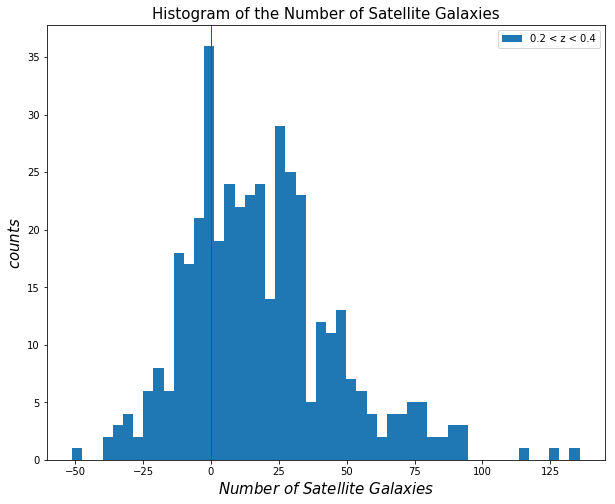

In [18]:
# z_cut_Nsat(z_LRG, Nsat)
# len(sumsat)

def totalNsat(Nsat):

    import matplotlib.pylab as plt 	
    import numpy as np
    from scipy import stats
    
    sumsat = []
    
    # Sum up number of satellite galaxies for every LRG
    for i in range(len(Nsat)):
        sumsat.append(np.sum(Nsat[i]))

    meansat = np.mean(sumsat)
    print("mean number of satellites is", meansat)
    
    mediansat = np.median(sumsat)
    print("median number of satellites is", mediansat)

    sdsat = np.std(sumsat)
    print("standard deviation of satellites is", sdsat)

    sterr = stats.sem(sumsat)
    print("standard error is", sterr)

    plt.rcParams["figure.figsize"] = [10, 8]
    plt.title("Histogram of the Number of Satellite Galaxies", fontsize=15)
    plt.hist(sumsat, bins=50, label='0.2 < z < 0.4')
    plt.axvline(linewidth=1, color='red')
    plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=15)
    plt.ylabel(r'$counts$', fontsize=15)
    plt.legend(loc='upper right')
    # plt.show()
    plt.savefig('/Users/mtownsend/Desktop/Nsatz1.jpeg')
    return(mediansat)

# 0.2 <= z < 0.3
Nsat2z = Nsat[np.where((z_LRG >= 0.2) & (0.4 > z_LRG))]

 # 0.3 <= z < 0.4
Nsat3z = Nsat[np.where((z_LRG >= 0.4) & (0.6 > z_LRG))]

# 0.4 <= z < 0.5
Nsat4z = Nsat[np.where((z_LRG >= 0.6) & (0.8 > z_LRG))]
 
# 0.5 <= z < 0.6
# Nsat5z = Nsat[np.where((z_LRG >= 0.5) & (0.6 > z_LRG))]

# # 0.6 <= z < 0.7
# Nsat6z = Nsat[np.where((z_LRG >= 0.6) & (0.7 > z_LRG))]

# # 0.7 >= z 
# Nsat7z = Nsat[np.where(z_LRG >= 0.7)]

totalNsat(Nsat2z)

In [36]:
# median_sumsat1z = np.median(sumsat1z)
# print("median number of satellites at z < 0.2:", median_sumsat1z)
median_sumsat2z = np.median(sumsat2z)
print("median number of satellites at 0.2 <= z < 0.3:", median_sumsat2z)
median_sumsat3z = np.median(sumsat3z)
print("median number of satellites at 0.3 <= z < 0.4:", median_sumsat3z)
median_sumsat4z = np.median(sumsat4z)
print("median number of satellites at 0.4 <= z < 0.5:", median_sumsat4z)
median_sumsat5z = np.median(sumsat5z)
print("median number of satellites at 0.5 <= z < 0.6:", median_sumsat5z)
median_sumsat6z = np.median(sumsat6z)
print("median number of satellites at 0.6 <= z < 0.7:", median_sumsat6z)
median_sumsat7z = np.median(sumsat7z)
print("median number of satellites at z < 0.7:", median_sumsat7z)

median number of satellites at 0.2 <= z < 0.3: 14.494750099409888
median number of satellites at 0.3 <= z < 0.4: 14.221943376380022
median number of satellites at 0.4 <= z < 0.5: 8.722105981470577
median number of satellites at 0.5 <= z < 0.6: 8.2130749389689
median number of satellites at 0.6 <= z < 0.7: 8.131570668715124
median number of satellites at z < 0.7: 6.748870402932231


In [19]:
# Divvy up by redshift slice

Nsat1z = Nsat[np.where(z_LRG < 0.2)]

# 0.2 <= z < 0.3
Nsat2z = Nsat[np.where((z_LRG >= 0.2) & (0.3 > z_LRG))]

 # 0.3 <= z < 0.4
Nsat3z = Nsat[np.where((z_LRG >= 0.3) & (0.4 > z_LRG))]

# 0.4 <= z < 0.5
Nsat4z = Nsat[np.where((z_LRG >= 0.4) & (0.5 > z_LRG))]
 
# 0.5 <= z < 0.6
Nsat5z = Nsat[np.where((z_LRG >= 0.5) & (0.6 > z_LRG))]

# 0.6 <= z < 0.7
Nsat6z = Nsat[np.where((z_LRG >= 0.6) & (0.7 > z_LRG))]

# 0.7 >= z 
Nsat7z = Nsat[np.where(z_LRG >= 0.7)]
 
print(Nsat3z.shape)

(251, 30, 30, 30)


In [ ]:
def cmdHistograms(H, edges):

    # This function plots a color-magnitude 2D histogram for satellites around LRG; produces a histogram for every LRG

    import matplotlib.pyplot as plt
    import numpy as np

    plt.rcParams.update({'figure.max_open_warning': 0})

    rz_zmag_sum = list(np.zeros((25,25)))
    gr_zmag_sum = list(np.zeros((25,25)))
    gr_rz_sum = list(np.zeros((25,25)))
    for i in range(len(H)):
        # make 2D projections of 3D histogram
        rz_v_zmag = H[i][:, :, :].sum(axis=2)
        rz_vs_zmag = np.flipud(rz_v_zmag)
        rz_zmag_sum = np.add(rz_zmag_sum, rz_vs_zmag)
        gr_v_zmag = H[i][:, :, :].sum(axis=0)
        gr_vs_zmag = np.flipud(gr_v_zmag.T)
        gr_zmag_sum = np.add(gr_zmag_sum, gr_vs_zmag)
        gr_v_rz = H[i][:, :, :].sum(axis=1)
        gr_vs_rz = np.flipud(gr_v_rz.T)
        gr_rz_sum = np.add(gr_rz_sum, gr_vs_rz)
        

        # plot 2D histograms using matshow; 3 plots per image
#         f, axarr = plt.subplots(111, figsize=(10, 10))
#         f.suptitle("Satellite Density CMD (LRG {})".format(i))

    im1 = plt.matshow(rz_zmag_sum, cmap=plt.cm.Purples, extent=[edges[1][0], edges[1][len(edges[1]) - 1], edges[0][0], edges[0][len(edges[0]) - 1]])
    plt.scatter(zmag_LRG[np.where(z_LRG >= 0.7)], rzcolor_LRG[np.where(z_LRG >= 0.7)], s=2, color='red', label="LRG")
    plt.title("Satellite Color-Magnitude Diagram (z >= 0.7)".format(i), fontsize=15, pad=5)
#         plt.xaxis.set_ticks_position('bottom')
#         plt.invert_xaxis()
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
    plt.gca().invert_xaxis()
#         plt.xlim(22, 10)
    plt.ylim(-5, 5)
#         plt.set(xlabel='zmag', ylabel='(r-z)')
#         plt.set_ylim(bottom=-5, top=5)
    plt.colorbar(im1, fraction=0.08, pad=0.05)
#         s = 'LRG redshift: {0:.2f}'.format(z_LRG[i])
#         t = 'LRG coords: {:.2f}, {:.2f}'.format(ra_LRG[i], dec_LRG[i])
#         plt.text(16, -2, s, family='sans-serif', fontsize=14)
#         plt.text(16, -2.5, t, family='sans-serif', fontsize=14)
#         axarr[0].title("Satellite Color-Magnitude Diagram (LRG {})".format(i), fontsize=15)
    plt.xlabel(r'$z-mag$', fontsize=12)
    plt.ylabel(r'$(r-z)$ $color$', fontsize=12)
    plt.legend(loc='upper right', prop={'size': 12})

        # save image with incrementing file name
    plt.savefig('/Users/mtownsend/Desktop/satHistCMDs/satHistCMD-zslice7.jpeg'.format(i))
#     plt.show()
    
# cmdHistograms(Nsat1z, edges)
# cmdHistograms(Nsat2z, edges)
# cmdHistograms(Nsat3z, edges)
# cmdHistograms(Nsat4z, edges)
# cmdHistograms(Nsat5z, edges)
# cmdHistograms(Nsat6z, edges)
cmdHistograms(Nsat7z, edges)


[14.4947501  14.22194338  8.72210598  8.21307494  8.13157067  6.7488704 ]


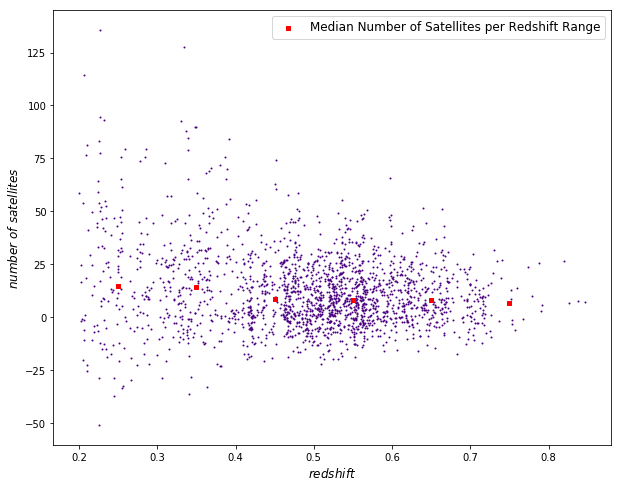

In [38]:
# median_sumsat = np.append(median_sumsat1z, [median_sumsat2z, median_sumsat3z, median_sumsat4z, median_sumsat5z, median_sumsat6z, median_sumsat7z])
median_sumsat = np.append(median_sumsat2z, [median_sumsat3z, median_sumsat4z, median_sumsat5z, median_sumsat6z, median_sumsat7z])
median_z = np.array([0.25, 0.35, 0.45, 0.55, 0.65, 0.75])

print(median_sumsat)

plt.scatter(z_LRG, sumsat, s=1, c='indigo')
plt.scatter(median_z, median_sumsat, s=10, c='red', marker=',', label="Median Number of Satellites per Redshift Range")
plt.xlabel(r'$redshift$', fontsize=12)
plt.ylabel(r'$number$ $of$ $satellites$', fontsize=12)
plt.legend(loc='upper right', prop={'size': 12})
plt.savefig('/Users/mtownsend/Desktop/medianNsat.jpeg')
plt.show()


In [ ]:
print(len(index))
print(index[0])
print(len(index[0]))

In [ ]:
def choose_satellites(index, Nsat):

    # identifying specific near neighbors as satellites

    # index variable comes from nearNeighbors(). It is a list of indicies for galaxies that appear within the search 
    # radius of the LRG (one list for every LRG). The following loop assigns each of these galaxies into a color-color-mag
    # bin so they can be selected by those properties later. Each LRG has a list of arrays that coorespond to a 
    # color-color-mag bin that holds the indices of the near neighbors that reside in that bin.

    near_index = []
    a = []
    for k in range(len(index)):
        ind = np.array(index[k])
        for i in range(len(edges[0])-1):
            for j in range(len(edges[1])-1):
                for m in range(len(edges[2])-1):
                    a.append(ind[np.where((zmag[ind] >= edges[1][j]) & (zmag[ind] <= edges[1][j+1]) & (rzcolor[ind] >= edges[0][i]) & (rzcolor[ind] <= edges[0][i+1]) & (grcolor[ind] >= edges[2][m]) & (grcolor[ind] <= edges[2][m+1]))])           
        near_index.append(a)
        a = []

    print('near_index shape: ', np.array(near_index).shape)
#     print(near_index[0])
#     print('----')
    
    
    # This loop flattens the Nsat array. Now we have an array that matches near_index (each index corresponds to a
    # color-color-mag bin). Each index for flat_Nsat tells me how many satellites are in that bin. near_index tells me
    # which galaxies those might be. 

    a = []
    flat_Nsat = []
    for i in range(len(Nsat)):
        for y in range(len(Nsat[i])):
    #     print('y = ', y)
            for x in range(len(Nsat[i][y])):
    #         print('x = ', x)
                for z in range(len(Nsat[i][y][x])):
    #             print("z = ", z)
                    a.append(Nsat[i][y][x][z])
        flat_Nsat.append(a)
        a = []

    print('flat_Nsat shape: ', np.array(flat_Nsat).shape)
    # print(flat_Nsat[1])
    # print(flat_Nsat[0][7])



    # The function round_half_up rounds numbers that include 0.5 and up to the next integer, and down if the number
    # includes a decimal below 0.5. np.set_printoptions makes sure I can print as many plots as I need.    

    import sys
    np.set_printoptions(threshold=sys.maxsize)


    def round_half_up(n, decimals):
        import math

        multiplier = 10 ** decimals
        return math.floor(n * multiplier + 0.5) / multiplier


    # good_ind is a list of near neighbor indices that are chosen to be satellites. There is a good_ind[i] for each LRG.
    # The loop below takes flat_Nsat (the number of satellites in each bin), rounds to the nearest integer, then that
    # number of near neighbors are chosen as satellites. 

    good_ind = []
    x = []
    # for i in range(len(flat_Nsat[12])):
    for i in range(len(flat_Nsat)):
        for j in range(len(flat_Nsat[i])):
            if flat_Nsat[i][j] > 0.5:
                n = int(round_half_up(flat_Nsat[i][j], 0))
#                 print(n)
                np.random.seed(0)
                x.append(np.random.choice(near_index[i][j], size=int(n), replace=False))
    #             print(x)
    #             good_ind.append(x)
    #             print(good_ind)
            else:
                pass
    #         print('i,j = {}, {}'.format(i, j))
        good_ind.append(x)
        x = []

#     print('good_ind shape: ', np.array(good_ind).shape)
#     print(len(good_ind[0]))


    # good_ind is a list of arrays. Each array index is stored as an array in and of itself, which is not what I want.
    # The p list in the loop below converts this to just a list of lists. Each LRG has a seperate list of indices that
    # that can more easily be used later. These indices are the indices of the near neighbors chosen to be satellites.

    chosen_sats = []
    t = []
    for i in range(len(good_ind)):
        if len(good_ind[i]) > 0:
    #         print(i)
            chosen_sats.append(np.concatenate(good_ind[i]))
        else:
    #         pass
    #         print(i)
            chosen_sats.append(t)

    chosen_sats = np.array(chosen_sats)
#     print('length of p: ', len(p))

    return (good_ind, flat_Nsat, near_index, chosen_sats)

In [ ]:
good_ind, flat_Nsat, near_index, chosen_sats = choose_satellites(index,Nsat)
# print(len(chosen_sats[0]))


In [ ]:
# # print(len(chosen_sats[0]))


# def round_half_up(n, decimals):
#     import math

#     multiplier = 10 ** decimals
#     return math.floor(n * multiplier + 0.5) / multiplier


# random_sats = []
# x = []
# for i in range(len(flat_Nsat)):
#     n = int(round_half_up(np.sum(flat_Nsat[i]), 0))
# #     print('n = ', n)
#     np.random.seed(0)
#     x.append(np.random.choice(chosen_sats[i], size=int(n), replace=False))           
    
# random_sats.append(x)
# x = []
        
print('length chosen_sats = ', len(chosen_sats))

Nsat_arr = np.array(flat_Nsat)

sumNegNsat = []
sumPosNsat = []
sumNsat = []

for i in range(len(Nsat_arr)):
    neg = np.sum(Nsat_arr[i][np.where(Nsat_arr[i] < 0.0)])
    pos = np.sum(Nsat_arr[i][np.where(Nsat_arr[i] > 0.0)])
    num = np.sum(Nsat_arr[i])
    sumNegNsat.append(neg)
    sumPosNsat.append(pos)
    sumNsat.append(num)

# sumNegNsat = np.sum(Nsat_arr[0][np.where(Nsat_arr[0] < 0.0)])
print(len(sumNegNsat))
# sumPosNsat = np.sum(Nsat_arr[0][np.where(Nsat_arr[0] > 0.0)])
print(len(sumPosNsat))
# sumNsat = np.sum(Nsat_arr[0])
print(len(sumNsat))
print(len(chosen_sats))

sats = []
for i in range(len(chosen_sats)):
    sats.append(len(chosen_sats[i]))

# print(sats)
# print(sumNsat)

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(sumNsat, sats)
print("slope: %f    intercept: %f"% (slope, intercept))
print("R-squared: %f" % r_value**2)
print(type(intercept))
y =  intercept + slope*np.array(sumNegNsat)
# z = np.polyfit(sumNegNsat, excess, 1)
# print(z)
# trendpoly = np.poly1d(z) 

plt.style.use('seaborn-whitegrid')
plt.title("Number of Chosen Sats vs Nsat", fontsize=17)
plt.scatter(sumNsat, sats, s=3)
plt.plot(sumNsat, intercept + slope*np.array(sumNsat), color='black', label='fitted line')
# plt.plot(sumNegNsat, trendpoly(sumNegNsat), color='black', linestyle='solid')
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$chosenSats$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/chosenSats_v_Nsat30.jpeg')
plt.show()

In [ ]:
from scipy import stats

excess = np.array(sats) - np.array(sumNsat)
print(len(excess))

slope, intercept, r_value, p_value, std_err = stats.linregress(sumNegNsat, excess)
print("slope: %f    intercept: %f"% (slope, intercept))
print("R-squared: %f" % r_value**2)
print(type(intercept))
y =  intercept + slope*np.array(sumNegNsat)
# z = np.polyfit(sumNegNsat, excess, 1)
# print(z)
# trendpoly = np.poly1d(z) 

plt.style.use('seaborn-whitegrid')
plt.title("Excess of Chosen Sats vs Neg Sats", fontsize=17)
plt.scatter(sumNegNsat, excess, s=3)
plt.plot(sumNegNsat, intercept + slope*np.array(sumNegNsat), color='black', label='fitted line')
# plt.plot(sumNegNsat, trendpoly(sumNegNsat), color='black', linestyle='solid')
plt.xlabel(r'$Neg$ $Nsat$', fontsize=15)
plt.ylabel(r'$excess$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/excess_v_negsats.jpeg')
plt.show()

In [ ]:
# loop to isolate the fractional part of satellites

import math

z = []
dec = []
for i in range(len(flat_Nsat)):
    for j in range(len(flat_Nsat[i])):
        if flat_Nsat[i][j] > 0.:
            x,y = math.modf(flat_Nsat[i][j]) # x is the decimal portion
            z.append(x)
        else:
            pass
    dec.append(z)
    z = []
    
print(dec[0])


In [ ]:
# loop to add up 

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

sat_sep = []
for i in range(len(ra_LRG)):
    c_LRG = SkyCoord(ra_LRG[i]*u.deg, dec_LRG[i]*u.deg, distance=DL_Mpc[i]*u.Mpc)
    c_sat = SkyCoord(ra[np.where(chosen_sats[i])]*u.deg, dec[np.where(chosen_sats[i])]*u.deg, distance=DL_Mpc[i]*u.Mpc)
    sep = []
    sep = c_LRG.separation_3d(c_sat)
    sat_sep.append(sep)
    
print(len(sat_sep))
    

In [ ]:
# print(len(sat_sep))
# print(len(chosen_sats[0]))
# print(chosen_sats[0])
# print(np.array(sat_sep[2000]))
# print(type(sat_sep[0]))
# sat_sep_arr = np.array(sat_sep)
# print(type(sat_sep_arr[0]))

# print(ra[2255])
# print(dec[2255])
# print(ra_LRG[0])
# print(dec_LRG[0])

sat_sep_arr = []
for i in range(len(sat_sep)):
    sat_sep_arr.append(np.array(sat_sep[i]))
    
print(len(sat_sep_arr))
print(sat_sep_arr[0])
# print(sat_sep_arr)


In [ ]:
# all_sat_sep = np.concatenate(sat_sep)
# # print(len(all_sat_sep))
# # print(all_sat_sep)
# sat_sep_arr = np.array(all_sat_sep)
# print(len(sat_sep_arr))

all_sat_sep = np.concatenate(sat_sep_arr)
print(len(all_sat_sep))

plt.title("Satellite Separation from LRG", fontsize=20)
plt.hist(all_sat_sep, bins=50, alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_hist.jpeg')
plt.show()


In [ ]:
# Divvy up by redshift slice

sat_sep_array = np.array(sat_sep_arr)

# z < 0.2
# ind1 = np.where(z_LRG < 0.2)
# b = np.concatenate(ind1)
# print(b)
# print(type(sat_sep_arr))

sat_sep1z = sat_sep_array[np.where(z_LRG < 0.2)]
# print(sat_sep1z)

# 0.2 <= z < 0.3
sat_sep2z = sat_sep_array[np.where((z_LRG >= 0.2) & (0.3 > z_LRG))]
print(len(sat_sep2z))

 # 0.3 <= z < 0.4
sat_sep3z = sat_sep_array[np.where((z_LRG >= 0.3) & (0.4 > z_LRG))]
print(len(sat_sep3z))

# 0.4 <= z < 0.5
sat_sep4z = sat_sep_array[np.where((z_LRG >= 0.4) & (0.5 > z_LRG))]
print(len(sat_sep4z))
 
# 0.5 <= z < 0.6
sat_sep5z = sat_sep_array[np.where((z_LRG >= 0.5) & (0.6 > z_LRG))]
print(len(sat_sep5z))

# 0.6 <= z < 0.7
sat_sep6z = sat_sep_array[np.where((z_LRG >= 0.6) & (0.7 > z_LRG))]
print(len(sat_sep6z))

# 0.7 >= z 
sat_sep7z = sat_sep_array[np.where(z_LRG >= 0.7)]
print(len(sat_sep7z))

# print(len(sat_sep1z)+len(sat_sep2z)+len(sat_sep3z)+len(sat_sep4z)+len(sat_sep5z)+len(sat_sep6z)+len(sat_sep7z))

In [ ]:
# make plots in redshift slices

plt.title("Satellite Separation from LRG (z < 0.2)", fontsize=20)
plt.hist(np.concatenate(sat_sep1z), bins=25, color='lightblue', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz1.jpeg')
plt.show()

plt.title("Satellite Separation from LRG (0.2 <= z < 0.3)", fontsize=20)
plt.hist(np.concatenate(sat_sep2z), bins=25, color='orange', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz2.jpeg')
plt.show()

plt.title("Satellite Separation from LRG (0.3 <= z < 0.4)", fontsize=20)
plt.hist(np.concatenate(sat_sep3z), bins=25, color='green', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz3.jpeg')
plt.show()

plt.title("Satellite Separation from LRG (0.4 <= z < 0.5)", fontsize=20)
plt.hist(np.concatenate(sat_sep4z), bins=25,  color='red', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz4.jpeg')
plt.show()

plt.title("Satellite Separation from LRG (0.5 <= z < 0.6)", fontsize=20)
plt.hist(np.concatenate(sat_sep5z), bins=25, color='purple', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz5.jpeg')
plt.show()

plt.title("Satellite Separation from LRG (0.6 <= z < 0.7)", fontsize=20)
plt.hist(np.concatenate(sat_sep6z), bins=25, color='brown', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz6.jpeg')
plt.show()

plt.title("Satellite Separation from LRG (z >= 0.7)", fontsize=20)
plt.hist(np.concatenate(sat_sep7z), bins=25, color='pink', alpha=0.5)
plt.xlabel(r'$Separation$ $(Mpc)$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/sat_sep_histz7.jpeg')
plt.show()

In [15]:
# use Moustakas code to find stellar masses of LRGs
import os
import numpy as np

from astropy.table import Table, hstack
from scipy.spatial import cKDTree as KDTree


In [16]:
def read_isedfit():
    """Read the iSEDfit fitting results."""

    parentfile = '/Users/mtownsend/anaconda/Data/lrg_parent.fits.gz'
    isedfile = '/Users/mtownsend/anaconda/Data/legacysurvey_lrg_ckc14z_kroupa01_charlot_sfhgrid01.fits.gz'
    kcorrfile = '/Users/mtownsend/anaconda/Data/legacysurvey_lrg_ckc14z_kroupa01_charlot_sfhgrid01_kcorr.z0.0.fits.gz'

    print('Reading {}'.format(parentfile))
    parent = Table.read(parentfile)
    print('Reading {}'.format(isedfile))
    ised = Table.read(isedfile)
    print('Reading {}'.format(kcorrfile))
    kcorr = Table.read(kcorrfile)

    snrmin = 3.0
    chi2min = 10

    keep = np.where(
        (ised['CHI2'] < chi2min) *
        (np.sum(ised['MAGGIES'] * np.sqrt(ised['IVARMAGGIES']) > snrmin, axis=1) == 5)
    )[0]
    print('Read {} galaxies with chi2 < {} and S/N > {} in all 5 photometric bands.'.format(
        len(keep), chi2min, snrmin))

    cat = dict()
    cat['weight'] = len(keep) * parent['COUNT'][keep].data / np.sum(parent['COUNT'][keep].data)
    cat['redshift'] = kcorr['Z'][keep].data
    cat['Mstar'] = ised['MSTAR_50'][keep].data
    cat['Mg'] = kcorr['ABSMAG'][keep, 0].data
    cat['Mr'] = kcorr['ABSMAG'][keep, 1].data
    cat['Mz'] = kcorr['ABSMAG'][keep, 2].data
    cat['gr'] = cat['Mg'] - cat['Mr']
    cat['rz'] = cat['Mr'] - cat['Mz']

    with np.errstate(invalid='ignore'):
        cat['grobs'] = -2.5 * np.log10(ised['MAGGIES'][keep, 0].data / ised['MAGGIES'][keep, 1].data)
        cat['rzobs'] = -2.5 * np.log10(ised['MAGGIES'][keep, 1].data / ised['MAGGIES'][keep, 2].data)
        cat['zW1obs'] = -2.5 * np.log10(ised['MAGGIES'][keep, 2].data / ised['MAGGIES'][keep, 3].data)

    # mm = - 2.5 * np.log10(ised['MAGGIES'][keep, 0].data)
    # _ = plt.hist(mm, bins=100)

    kcorr.remove_columns(['Z', 'ISEDFIT_ID', 'MAGGIES', 'IVARMAGGIES'])
    out = hstack([ised[keep], kcorr[keep]])

    return cat, out

In [17]:
cat, ised = read_isedfit()
ngal = len(ised)

Reading /Users/mtownsend/anaconda/Data/lrg_parent.fits.gz
Reading /Users/mtownsend/anaconda/Data/legacysurvey_lrg_ckc14z_kroupa01_charlot_sfhgrid01.fits.gz
Reading /Users/mtownsend/anaconda/Data/legacysurvey_lrg_ckc14z_kroupa01_charlot_sfhgrid01_kcorr.z0.0.fits.gz
Read 48817 galaxies with chi2 < 10 and S/N > 3.0 in all 5 photometric bands.


In [30]:
ra_MOUS = np.array(ised['RA'])
dec_MOUS = np.array(ised['DEC'])
mass_MOUS = np.array(ised['MSTAR'])
z_MOUS = np.array(ised['Z'])
id_MOUS = np.array(ised['ISEDFIT_ID'])
maggies = np.array(ised['MAGGIES'])

print(len(ra_MOUS))
print(len(dec_MOUS))
print(len(mass_MOUS))
print(len(id_MOUS))
print(len(maggies))
print(maggies[0])
print(len(ra_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]))
print(len(dec_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]))

48817
48817
48817
48817
48817
[5.0697251e-09 2.6373774e-08 5.9494106e-08 1.0042600e-07 7.1027877e-08]
105
105


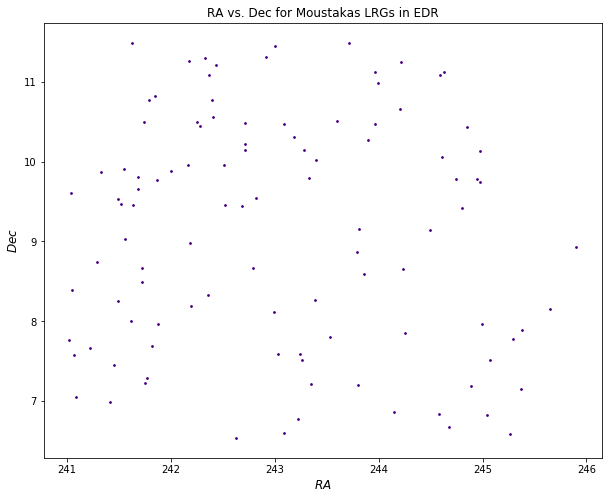

In [25]:
plt.scatter(ra_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))], dec_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))], s=3, c='indigo')
# plt.scatter(ra_LRG, dec_LRG, s=1, c='red')
plt.xlabel(r'$RA$', fontsize=12)
plt.ylabel(r'$Dec$', fontsize=12)
plt.title("RA vs. Dec for Moustakas LRGs in EDR")
# plt.legend(loc='upper right', prop={'size': 12})
plt.savefig('/Users/mtownsend/Desktop/ra-dec-EDR_MOUS.jpeg')
plt.show()



In [66]:
from astropy.coordinates import SkyCoord, match_coordinates_sky                                   
from astropy import units as u    

mous_cat = SkyCoord(ra=ra_MOUS*u.degree, dec=dec_MOUS*u.degree)                          

my_cat = SkyCoord(ra=ra_LRG*u.degree, dec=dec_LRG*u.degree)                                

idx, sep2d, dist3d = match_coordinates_sky(my_cat, mous_cat, nthneighbor=1)
# idx, sep2d, dist3d = my_cat.match_to_catalog_sky(mous_cat)

print(len(ra_LRG))
print(len(idx))

mass_LRG = mass_MOUS[idx]
print(len(mass_LRG))

unique_idx = np.unique(idx, return_index=False, return_inverse=False, return_counts=False)



maggies_match = maggies[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
print(len(maggies_match))
print(maggies_match[0])
print(maggies_match[0][0])

mag_MOUS = 22.5 - 2.5 * np.log10(maggies_match*10**9.)
print(len(mag_MOUS))
print(mag_MOUS[0])

gmag_MOUS = []
rmag_MOUS = []
zmag_MOUS = []
for i in range(len(mag_MOUS)):
    gmag_MOUS.append(mag_MOUS[i][0])
    rmag_MOUS.append(mag_MOUS[i][1])
    zmag_MOUS.append(mag_MOUS[i][2])

print(gmag_MOUS[0])
print(rmag_MOUS[0])
print(zmag_MOUS[0])
grcolor_MOUS = np.array(gmag_MOUS) - np.array(rmag_MOUS)
rzcolor_MOUS = np.array(rmag_MOUS) - np.array(zmag_MOUS)
print(len(grcolor_MOUS))
print(len(rzcolor_MOUS))

1983
1983
1983
105
[3.5251420e-09 1.9778080e-08 5.8345208e-08 1.2703239e-07 8.0802337e-08]
3.525142e-09
105
[21.13206  19.25954  18.084988 17.240213 17.73144 ]
21.13206
19.25954
18.084988
105
105


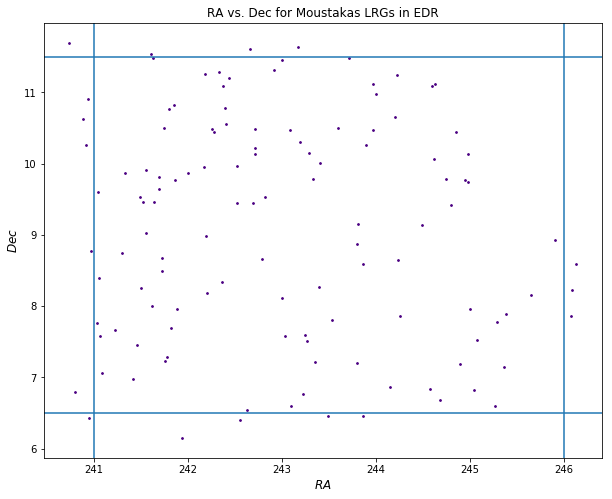

In [68]:
# plt.scatter(ra_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))], dec_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))], s=3, c='indigo')
plt.scatter(ra_MOUS[unique_idx], dec_MOUS[unique_idx], s=3, c='indigo')
# plt.scatter(ra_LRG, dec_LRG, s=1, c='red')
plt.xlabel(r'$RA$', fontsize=12)
plt.ylabel(r'$Dec$', fontsize=12)
plt.axvline(x=241)
plt.axvline(x=246)
plt.axhline(y=6.5)
plt.axhline(y=11.5)
plt.title("RA vs. Dec for Moustakas LRGs in EDR")
# plt.legend(loc='upper right', prop={'size': 12})
plt.savefig('/Users/mtownsend/Desktop/unique-idx_MOUS.jpeg')
plt.show()


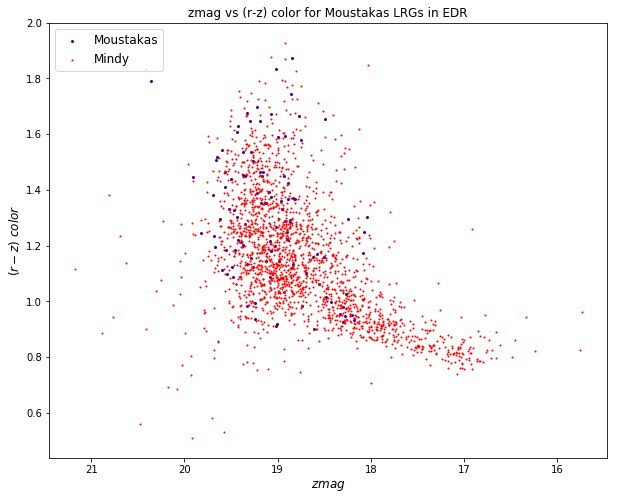

In [70]:
plt.scatter(zmag_MOUS, rzcolor_MOUS, s=4, c='indigo', label="Moustakas")
plt.scatter(zmag_LRG, rzcolor_LRG, s=1, c='red', label="Mindy")
plt.xlabel(r'$zmag$', fontsize=12)
plt.ylabel(r'$(r-z)$ $color$', fontsize=12)
plt.gca().invert_xaxis()
plt.title("zmag vs (r-z) color for Moustakas LRGs in EDR")
plt.legend(loc='upper left', prop={'size': 12})
plt.savefig('/Users/mtownsend/Desktop/rzcolor-zmag-EDR_MOUS_Mindy.jpeg')
plt.show()


In [39]:
print(ra_MOUS[idx[0]])
print(ra_MOUS[idx[1]])
print(ra_LRG[1])
print(id_MOUS[idx[1]])

241.0417313210749
241.0417313210749
241.05811659763742
29685


In [40]:
sep = np.array(sep2d)
# print(type(sep))
# # print(sep[np.where(sep < 0.0006)])
print(len(sep[np.where(sep < 0.0003)]))
# # print(idx[np.where(sep < 0.0006)])

# print(sep[0])

my_cat_index = np.where(sep < 0.0003)[0]
print(len(my_cat_index))

print(id_LRG[my_cat_index[1]])
# print('----')
# print(ra_MOUS[idx[np.where(sep < 0.0003)]])

84
84
380146476


105
105


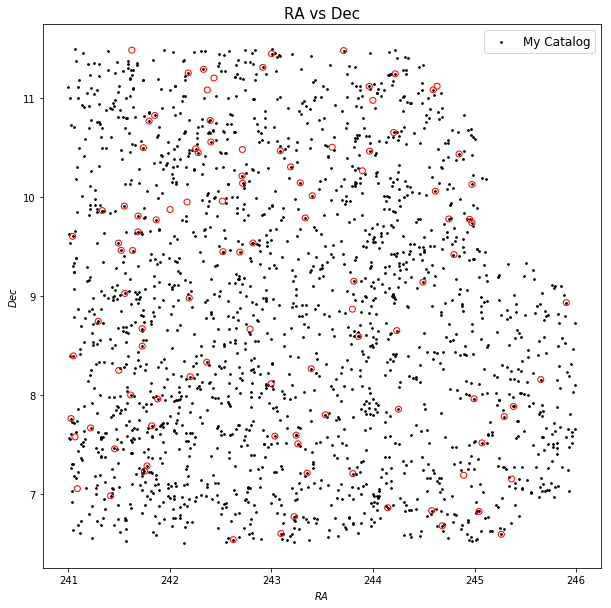

105
1983


In [45]:
ra_MOUS_cut = ra_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
print(len(ra_MOUS_cut))
dec_MOUS_cut = dec_MOUS[np.where((ra_MOUS >= 241) & (ra_MOUS <= 246)& (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
print(len(dec_MOUS_cut))

# (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5)


# plt.scatter(ra_MOUS[idx], dec_MOUS[idx], s=10, color='black', alpha=0, edgecolor="black", label="Moustakas Catalog")
plt.scatter(ra_LRG, dec_LRG, s=3, color='black', label="My Catalog")
# plt.scatter(ra_MOUS_cut, dec_MOUS_cut, s=10, color='red', alpha=0, edgecolor="red", label="Moustakas Catalog")
plt.rcParams["figure.figsize"] = [10, 10]
plt.title("RA vs Dec", fontsize=15)
plt.xlabel(r'$RA$')
plt.ylabel(r'$Dec$')
plt.legend(loc='upper right', prop={'size': 12})
# plt.savefig('/Users/mtownsend/Desktop/coordinate_match_comparison_ALL_LRGs.jpeg')

circle = []
for i in range(len(ra_MOUS_cut)):
    circle = plt.Circle((ra_MOUS_cut[i], dec_MOUS_cut[i]), 0.03, color='red', fill=False)
    plt.gcf().gca().add_artist(circle)
    
plt.savefig('/Users/mtownsend/Desktop/ra_dec_MOUS.jpeg')
plt.show()

print(len(ra_MOUS_cut))
print(len(ra_LRG))
# print(len(np.unique(idx)))

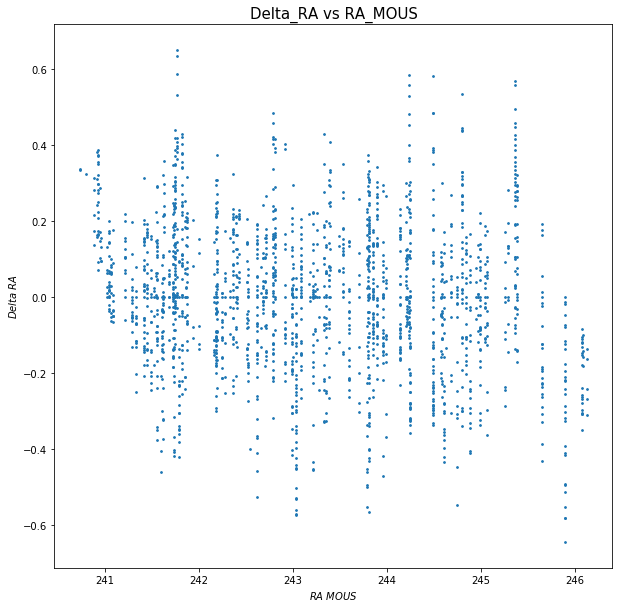

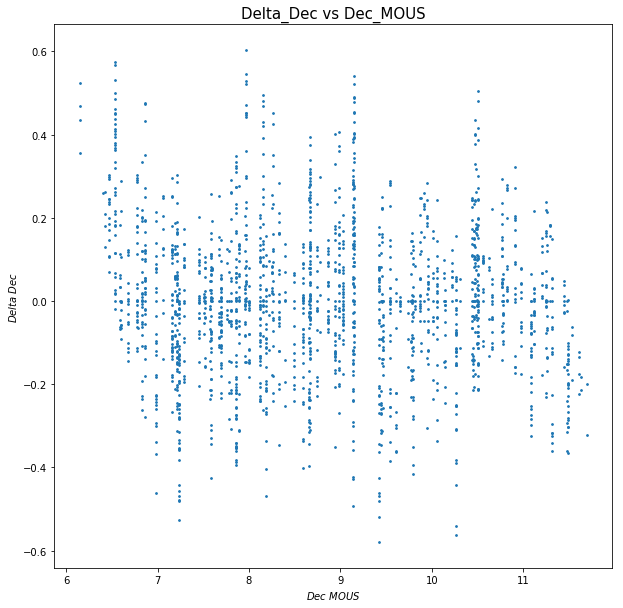

In [56]:
delta_ra = ra_LRG - ra_MOUS[idx]
delta_dec = dec_LRG - dec_MOUS[idx]

plt.scatter(ra_MOUS[idx], delta_ra, s=3)
plt.rcParams["figure.figsize"] = [10, 10]
plt.title("Delta_RA vs RA_MOUS", fontsize=15)
plt.xlabel(r'$RA$ $MOUS$')
plt.ylabel(r'$Delta$ $RA$')
plt.savefig('/Users/mtownsend/Desktop/deltaRA_v_raMOUS.jpeg')
plt.show()


plt.scatter(dec_MOUS[idx], delta_dec, s=3)
plt.rcParams["figure.figsize"] = [10, 10]
plt.title("Delta_Dec vs Dec_MOUS", fontsize=15)
plt.xlabel(r'$Dec$ $MOUS$')
plt.ylabel(r'$Delta$ $Dec$')
plt.savefig('/Users/mtownsend/Desktop/deltaDec_v_decMOUS.jpeg')
plt.show()
